In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('yellow_tripdata_2019-01.csv')

In [3]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1,2019-01-01 00:46:40,2019-01-01 00:53:20,1,1.5,1,N,151,239,1,7.0,0.5,0.5,1.65,0.0,0.3,9.95,NaN
1,1,2019-01-01 00:59:47,2019-01-01 01:18:59,1,2.6,1,N,239,246,1,14.0,0.5,0.5,1.00,0.0,0.3,16.30,NaN
2,2,2018-12-21 13:48:30,2018-12-21 13:52:40,3,0.0,1,N,236,236,1,4.5,0.5,0.5,0.00,0.0,0.3,5.80,NaN
3,2,2018-11-28 15:52:25,2018-11-28 15:55:45,5,0.0,1,N,193,193,2,3.5,0.5,0.5,0.00,0.0,0.3,7.55,NaN
4,2,2018-11-28 15:56:57,2018-11-28 15:58:33,5,0.0,2,N,193,193,2,52.0,0.0,0.5,0.00,0.0,0.3,55.55,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7667792 entries, 0 to 7667791
Data columns (total 18 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   VendorID               int64  
 1   tpep_pickup_datetime   object 
 2   tpep_dropoff_datetime  object 
 3   passenger_count        int64  
 4   trip_distance          float64
 5   RatecodeID             int64  
 6   store_and_fwd_flag     object 
 7   PULocationID           int64  
 8   DOLocationID           int64  
 9   payment_type           int64  
 10  fare_amount            float64
 11  extra                  float64
 12  mta_tax                float64
 13  tip_amount             float64
 14  tolls_amount           float64
 15  improvement_surcharge  float64
 16  total_amount           float64
 17  congestion_surcharge   float64
dtypes: float64(9), int64(6), object(3)
memory usage: 1.0+ GB


In [9]:
print("Training data has {} rows & {} columns".format(df.shape[0],df.shape[1]))

Training data has 7667792 rows & 18 columns


In [11]:
dict = {}
for i in list(df.columns):
    dict[i] = df[i].value_counts().shape[0]

pd.DataFrame(dict,index=["unique count"]).transpose()

,unique count
VendorID,3
tpep_pickup_datetime,2245960
tpep_dropoff_datetime,2250229
passenger_count,10
trip_distance,4390
RatecodeID,7
store_and_fwd_flag,2
PULocationID,263
DOLocationID,261
payment_type,4


In [43]:
df.isnull().sum().sum()

0

In [13]:
#dropping 'congestion_surcharge' as the whole column contains null values
del df['congestion_surcharge']

In [14]:
df.isnull().sum()

VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
dtype: int64

In [19]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
VendorID,7667792.0,1.636775,0.539820,1.0,1.00,2.00,2.00,4.00
passenger_count,7667792.0,1.567078,1.224431,0.0,1.00,1.00,2.00,9.00
trip_distance,7667792.0,2.801084,3.737529,0.0,0.90,1.53,2.80,831.80
RatecodeID,7667792.0,1.058371,0.678089,1.0,1.00,1.00,1.00,99.00
PULocationID,7667792.0,165.500918,66.391800,1.0,130.00,162.00,234.00,265.00
DOLocationID,7667792.0,163.752906,70.364452,1.0,113.00,162.00,234.00,265.00
payment_type,7667792.0,1.291776,0.473323,1.0,1.00,1.00,2.00,4.00
fare_amount,7667792.0,12.409409,262.072058,-362.0,6.00,8.50,13.50,623259.86
extra,7667792.0,0.328039,0.507479,-60.0,0.00,0.00,0.50,535.38
mta_tax,7667792.0,0.496846,0.053378,-0.5,0.50,0.50,0.50,60.80


In [27]:
# since minimum fare_amount and extra is a negative value which is not realistic hence dropping the negative values from the column

In [33]:
df = df[df.fare_amount>=0]
df = df[df.extra>=0]

In [34]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
VendorID,7660652.0,1.636438,0.539958,1.0,1.0,2.00,2.00,4.00
passenger_count,7660652.0,1.567030,1.224395,0.0,1.0,1.00,2.00,9.00
trip_distance,7660652.0,2.802827,3.737900,0.0,0.9,1.53,2.80,831.80
RatecodeID,7660652.0,1.058152,0.677754,1.0,1.0,1.00,1.00,99.00
PULocationID,7660652.0,165.505755,66.387221,1.0,131.0,162.00,234.00,265.00
DOLocationID,7660652.0,163.761079,70.364448,1.0,113.0,162.00,234.00,265.00
payment_type,7660652.0,1.289887,0.469153,1.0,1.0,1.00,2.00,4.00
fare_amount,7660652.0,12.428804,262.174529,0.0,6.0,8.50,13.50,623259.86
extra,7660652.0,0.328667,0.506215,0.0,0.0,0.00,0.50,535.38
mta_tax,7660652.0,0.497734,0.033581,0.0,0.5,0.50,0.50,2.42


In [44]:
creating a copy of main dataset
pre_df = df.copy()

In [45]:
vendor_mapping = {1:'Creative Mobile Technologies,LLC',2:'VeriFone Inc.'}
pre_df[VendorID]=pre_df[VendorID]

NameError: name 'VendorID' is not defined

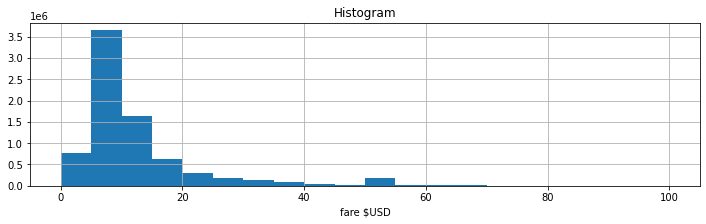

In [26]:
df[df.fare_amount<100].fare_amount.hist(bins=20, figsize=(12,3))
plt.xlabel('fare $USD')
plt.title('Histogram');

In [28]:
df.isnull().sum()

VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
dtype: int64

In [38]:
# i need to calculate which time of day or which day was taxis more booked
#graphs on price and trip distance
#how many customers came from which location
#how many customers used which vendor

In [39]:
df_filter = df[(df.trip_distance>0) & (df.fare_amount>0) & (df.passenger_count>0)].copy()

In [41]:
df_filter['tpep_dropoff_datetime'] = pd.to_datetime(df_filter['tpep_dropoff_datetime'])
df_filter['tpep_pickup_datetime'] = pd.to_datetime(df_filter['tpep_pickup_datetime'])

In [42]:
df_filter['trip_duration'] = (df_filter['tpep_dropoff_datetime'] - df_filter['tpep_pickup_datetime']).astype('timedelta64[m]')